<a href="https://colab.research.google.com/github/cclmcesarschool/RNA-e-Deep-Learning---CESAR-School-2023.2/blob/main/Atividade3.3/Datasets-e-dataloaders.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Carlos Cezar Lopes de Mendonça

In [ ]:
import numpy as np
import torch
from torch.utils.data import TensorDataset

from torchvision import transforms

from sklearn.datasets import load_iris

In [ ]:

iris = load_iris()
data = iris.data[iris.target==1,::2]  # comprimento das sépalas e pétalas, indices 0 e 2

x_data = data[:,0:1]
target = data[:,1:2]

print('dimensões de x_data:', x_data.shape)
print('dimensões de target:', target.shape)


dimensões de x_data: (50, 1)
dimensões de target: (50, 1)


In [ ]:
x_data = torch.FloatTensor(x_data)
target = torch.FloatTensor(target)

In [ ]:
dataset = TensorDataset(x_data, target)
len(dataset)

50

In [ ]:
i = 10
(x, y) = dataset[i]

print('sépala:', x)
print('pétala:', y)

sépala: tensor([5.])
pétala: tensor([3.5000])


In [ ]:
from torch.utils.data import Dataset

class IrisDataset(Dataset):
    def __init__(self, x_data, target):
        super(IrisDataset, self).__init__()

        self.data = x_data
        self.target = target

    def __len__(self):
        return self.data.shape[0]

    def __getitem__(self, index):

        sepala = self.data[index]
        petala = self.target[index]

        return (sepala, petala)

In [ ]:
x = data[:,0:1]
y = data[:,1:2]

dataset = IrisDataset(x, y)

In [ ]:
print(len(dataset))

50


In [ ]:
i = 1
print(dataset[i])

(array([6.4]), array([4.5]))


In [ ]:
data, target = dataset[30]

print('sépala:', data)
print('pétala:', target)

sépala: [5.5]
pétala: [3.8]


In [ ]:
print('tamanho do dataset: ', len(dataset))
print('amostra 12:', dataset[12])

tamanho do dataset:  50
amostra 12: (array([6.]), array([4.]))


In [ ]:
from torch.utils.data import DataLoader

data_loader = DataLoader(dataset,
                         batch_size=10, # tamanho do mini-batch de dados
                         shuffle=False)

In [ ]:
batch_n = 0
n_samples = 0
for data in data_loader:
    print('batch ', batch_n)
    batch_n += 1
    n_samples += len(data[0])

print('tamanho do DataLoader', len(data_loader))
print('tamanho do dataset', n_samples)

batch  0
batch  1
batch  2
batch  3
batch  4
tamanho do DataLoader 5
tamanho do dataset 50


In [ ]:
batch_n = 0

for data in data_loader:
    # separa a tupla em petalas e sépalas
    data_batch, targets_batch = data

    print('dimensão do batch de sépalas {}:   {}'.format(batch_n, data_batch.size()))
    print('dimensão do batch de pétalas {}: {}\n'.format(batch_n, targets_batch.size()))
    batch_n += 1

dimensão do batch de sépalas 0:   torch.Size([10, 1])
dimensão do batch de pétalas 0: torch.Size([10, 1])

dimensão do batch de sépalas 1:   torch.Size([10, 1])
dimensão do batch de pétalas 1: torch.Size([10, 1])

dimensão do batch de sépalas 2:   torch.Size([10, 1])
dimensão do batch de pétalas 2: torch.Size([10, 1])

dimensão do batch de sépalas 3:   torch.Size([10, 1])
dimensão do batch de pétalas 3: torch.Size([10, 1])

dimensão do batch de sépalas 4:   torch.Size([10, 1])
dimensão do batch de pétalas 4: torch.Size([10, 1])



In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt

In [ ]:


data_loader = DataLoader(dataset,
                         batch_size=10, # tamanho do mini-batch de dados
                         shuffle=False)

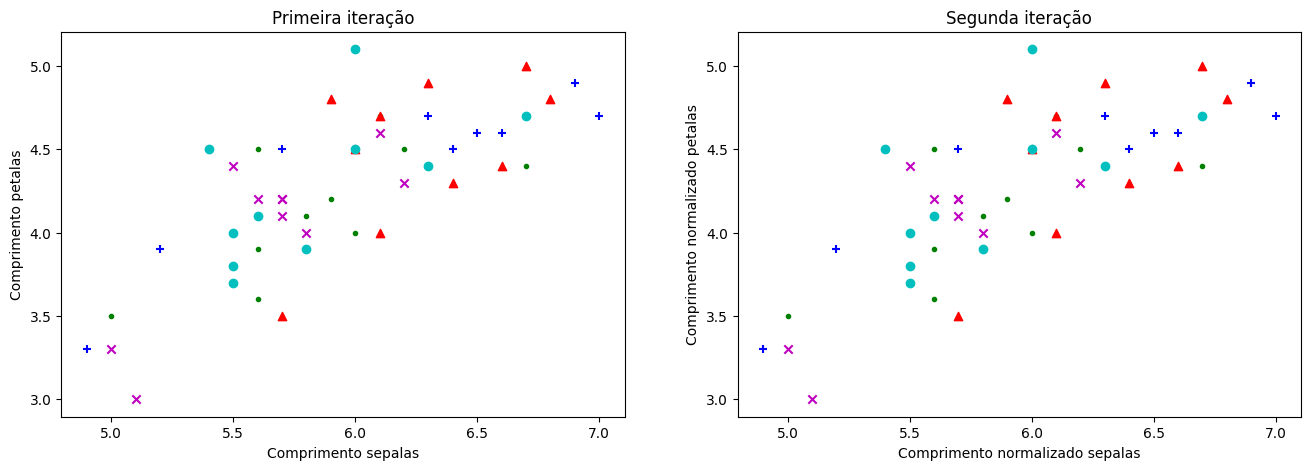

In [ ]:
color = ["b","g","r","c","m"]
mark = ['+', '.', '^', 'o', 'x']
fig = plt.figure(figsize=(16,5))
ax1 = fig.add_subplot(1,2,1)
ax1.set_xlabel('Comprimento sepalas')
ax1.set_ylabel('Comprimento petalas')
ax1.set_title('Primeira iteração')


for i,data in enumerate(data_loader):
    # separa a tupla em petalas e sépalas
    data_batch, targets_batch = data

    ax1.scatter(data_batch, targets_batch, c=color[i], marker=mark[i])

ax2 = fig.add_subplot(1,2,2)
ax2.set_xlabel('Comprimento normalizado sepalas')
ax2.set_ylabel('Comprimento normalizado petalas')
ax2.set_title('Segunda iteração')

for i,data in enumerate(data_loader):
    # separa a tupla em petalas e sépalas
    data_batch, targets_batch = data

    ax2.scatter(data_batch, targets_batch, c=color[i], marker=mark[i])


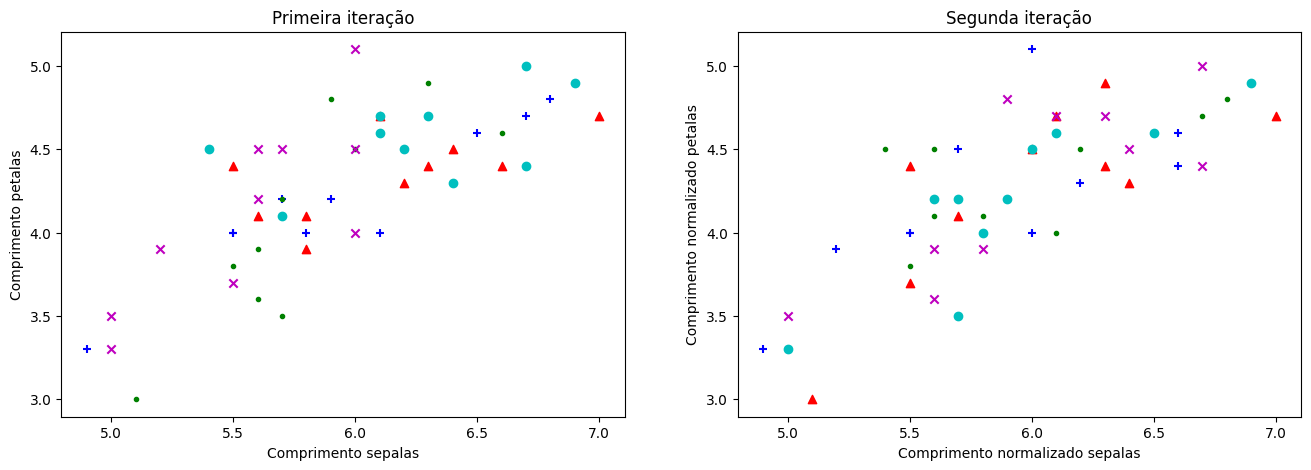

In [ ]:
## Com shuffle igual a True, os dados do mini-batch sempre mudam a cada iteração:


data_loader = DataLoader(dataset,
                         batch_size=10, # tamanho do mini-batch de dados
                         shuffle=True)  # se for True, embaralha os dados no inicio de cada iteração


color = ["b","g","r","c","m"]
mark = ['+', '.', '^', 'o', 'x']
fig = plt.figure(figsize=(16,5))
ax1 = fig.add_subplot(1,2,1)
ax1.set_xlabel('Comprimento sepalas')
ax1.set_ylabel('Comprimento petalas')
ax1.set_title('Primeira iteração')

for i,data in enumerate(data_loader):
    # separa a tupla em petalas e sépalas
    data_batch, targets_batch = data

    ax1.scatter(data_batch, targets_batch, c=color[i], marker=mark[i])

ax2 = fig.add_subplot(1,2,2)
ax2.set_xlabel('Comprimento normalizado sepalas')
ax2.set_ylabel('Comprimento normalizado petalas')
ax2.set_title('Segunda iteração')

for i,data in enumerate(data_loader):
    # separa a tupla em petalas e sépalas
    data_batch, targets_batch = data

    ax2.scatter(data_batch, targets_batch, c=color[i], marker=mark[i])

Defina seu próprio DataLoader na segunda célula abaixo. Faça com que cada batch tenha 5 elementos cada. Utilize o dataset já criado anteriormente.

Em seguida imprima o tamanho do Dataloader e tamanho do Dataset


# -- Defina aqui seu DataLoader com batches de 5 elementos cada ---
data_loader = None

# # -- tamanho do Dataloader e tamanho do Dataset


print('tamanho do DataLoader', )
print('tamanho do dataset', )


     
**A ordem dos elementos se altera entre execuções da célula acima?**  Sim, os dados são embaralhados e a ordem se altera.
Tente colocar o parametro shuffle do DataLoader como True e obeseve o resultado do exercício, rodando várias vezes.

In [ ]:
data_loader = DataLoader(dataset,batch_size=4, shuffle=True)

In [ ]:
import numpy as np
import torch
from torch.utils.data import DataLoader, TensorDataset

# Convertendo a lista 'data' para um array numpy
data = np.array(data)

# Dados do Iris dataset filtrados para a classe versicolor (classe 1)
x_data = torch.FloatTensor(data[:, 0:1])
target = torch.FloatTensor(data[:, 1:2])

# Criação do dataset
dataset = TensorDataset(x_data, target)

# Definindo o DataLoader com batches de 5 elementos
data_loader = DataLoader(dataset, batch_size=5, shuffle=True)

# Tamanho do DataLoader e do Dataset
print('Tamanho do DataLoader:', len(data_loader))
print('Tamanho do Dataset:', len(dataset))

# Executar múltiplas vezes para observar a ordem dos elementos
for _ in range(3):  # Execute 3 vezes para observar as mudanças
    data_loader = DataLoader(dataset, batch_size=5, shuffle=True)
    print("Nova execução do DataLoader")
    for batch in data_loader:
        print(batch)
        break  # Apenas para exibir o primeiro batch e verificar a ordem

Tamanho do DataLoader: 1
Tamanho do Dataset: 2
Nova execução do DataLoader
[tensor([[[4.4000]],

        [[6.7000]]]), tensor([[[4.7000]],

        [[6.1000]]])]
Nova execução do DataLoader
[tensor([[[6.7000]],

        [[4.4000]]]), tensor([[[6.1000]],

        [[4.7000]]])]
Nova execução do DataLoader
[tensor([[[6.7000]],

        [[4.4000]]]), tensor([[[6.1000]],

        [[4.7000]]])]
